## Data

In [1]:
from sklearn.datasets import load_wine
import pandas as pd

In [2]:
data, target = load_wine(return_X_y=True)

In [3]:
data_frame = pd.DataFrame(data=data, columns=load_wine().feature_names)

In [4]:
data_frame.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
from collections import Counter
Counter(target)

Counter({0: 59, 1: 71, 2: 48})

## Hyperparameter tuning

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [7]:
from sklearn.model_selection import GridSearchCV

### Decision Tree

In [8]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4]
}
grid_search = GridSearchCV(param_grid=parameters, 
                           estimator=DecisionTreeClassifier())
grid_search.fit(data, target)
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

In [9]:
best_parameters, best_score

({'criterion': 'gini',
  'min_samples_leaf': 1,
  'min_samples_split': 3,
  'splitter': 'random'},
 0.9330158730158731)

### Random forest

In [10]:
parameters = {
    'n_estimators': [10, 25, 40, 50],
    'criterion': ['entropy', 'gini'],
    'min_samples_split': [2, 3, 4, 5]
}
grid_search = GridSearchCV(param_grid=parameters, 
                           estimator=RandomForestClassifier())
grid_search.fit(data, target)
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_
best_parameters, best_score

({'criterion': 'gini', 'min_samples_split': 3, 'n_estimators': 40},
 0.9833333333333332)

### KNN

In [11]:
parameters = {
    'n_neighbors': [3, 5, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
grid_search = GridSearchCV(param_grid=parameters, 
                           estimator=KNeighborsClassifier())
grid_search.fit(data, target)
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_
best_parameters, best_score

({'n_neighbors': 3, 'p': 1, 'weights': 'distance'}, 0.7814285714285714)

### SVM

In [12]:
parameters = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [1, 1.5, 2],
    'degree': [2, 3, 4, 5]
}
grid_search = GridSearchCV(param_grid=parameters, 
                           estimator=SVC())
grid_search.fit(data, target)
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_
best_parameters, best_score

({'C': 1.5, 'degree': 2, 'kernel': 'linear'}, 0.9666666666666668)

### Neural Network

In [13]:
parameters = {
    'hidden_layer_sizes': [300, 400],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd', 'lbfgs'],
}
grid_search = GridSearchCV(param_grid=parameters, 
                           estimator=MLPClassifier())
grid_search.fit(data, target)
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_
best_parameters, best_score # {'activation': 'logistic', 'hidden_layer_sizes': 200, 'solver': 'adam'}

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


({'activation': 'logistic', 'hidden_layer_sizes': 400, 'solver': 'adam'},
 0.9444444444444444)

## Cross Validation


In [14]:
from sklearn.model_selection import cross_val_score, KFold

In [15]:
tree_results = []
rf_results = []
knn_results = []
svm_results = []
mlp_results = []

In [16]:
for i in range(30):
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)
  tree = DecisionTreeClassifier(criterion='gini', min_samples_leaf=2,
                                min_samples_split=2, splitter='random')
  score = cross_val_score(tree, data, target, cv=kfold)
  tree_results.append(score.mean())

In [17]:
for i in range(30):
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)
  rf = RandomForestClassifier(criterion='gini', min_samples_split=2, 
                              n_estimators=50)
  score = cross_val_score(rf, data, target, cv=kfold)
  rf_results.append(score.mean())

In [18]:
for i in range(30):
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)
  knn = KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')
  score = cross_val_score(knn, data, target, cv=kfold)
  knn_results.append(score.mean())

In [19]:
for i in range(30):
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)
  svm = SVC(C=1.5, gamma='scale', kernel='linear')
  score = cross_val_score(svm, data, target, cv=kfold)
  svm_results.append(score.mean())

In [ ]:
for i in range(30):
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)
  mlp = MLPClassifier(activation='logistic', hidden_layer_sizes=200, solver='adam')
  score = cross_val_score(mlp, data, target, cv=kfold)
  mlp_results.append(score.mean())

In [21]:
all_results = pd.DataFrame({
    'DecisionTree': tree_results, 
    'RandomForest': rf_results,
    'KNN': knn_results, 
    'SVM': svm_results,
    'NeuralNetwork': mlp_results
})
all_results

,DecisionTree,RandomForest,KNN,SVM,NeuralNetwork
0,0.915359,0.983333,0.809150,0.954902,0.943791
1,0.875490,0.983007,0.808497,0.948366,0.926471
2,0.900000,0.977451,0.815686,0.955229,0.932353
3,0.910784,0.988889,0.798366,0.950000,0.938562
4,0.944444,0.971895,0.810131,0.955556,0.927778
5,0.910458,0.983007,0.826471,0.955229,0.933333
6,0.909150,0.977778,0.792157,0.966013,0.943791
7,0.903922,0.983007,0.813399,0.954902,0.943137
8,0.910784,0.971569,0.820261,0.943791,0.932680
9,0.904902,0.983333,0.802941,0.950000,0.944118


In [22]:
all_results.describe()

,DecisionTree,RandomForest,KNN,SVM,NeuralNetwork
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.902135,0.980817,0.804793,0.956155,0.937266
std,0.020928,0.005104,0.012758,0.006054,0.006844
min,0.859477,0.971242,0.774510,0.943791,0.921569
25%,0.889788,0.977451,0.798039,0.951062,0.932435
50%,0.904085,0.983007,0.805882,0.955229,0.938072
75%,0.910784,0.983333,0.812582,0.960703,0.943709
max,0.944444,0.988889,0.826471,0.966667,0.950000


In [23]:
all_results.std() / all_results.mean() * 100

DecisionTree     2.319851
RandomForest     0.520395
KNN              1.585294
SVM              0.633155
NeuralNetwork    0.730202
dtype: float64

## Results

In [25]:
from scipy.stats import shapiro
import seaborn as sns
alpha = 0.05

In [28]:
shapiro(tree_results), shapiro(rf_results), shapiro(knn_results), shapiro(svm_results), shapiro(mlp_results)

((0.9780657887458801, 0.7721234560012817),
 (0.8915293216705322, 0.005245048552751541),
 (0.9733400344848633, 0.6339818239212036),
 (0.9413703680038452, 0.099029541015625),
 (0.9579303860664368, 0.27398794889450073))

rf_results doesn't have a normal distribution

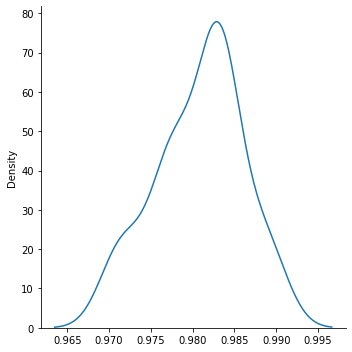

In [30]:
sns.displot(rf_results, kind='kde') # the best result and the worst bell curve

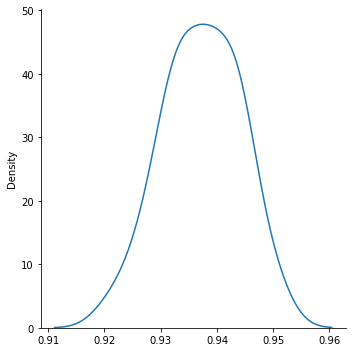

In [33]:
sns.displot(mlp_results, kind='kde') # one of the worst results and the perfect bell curve

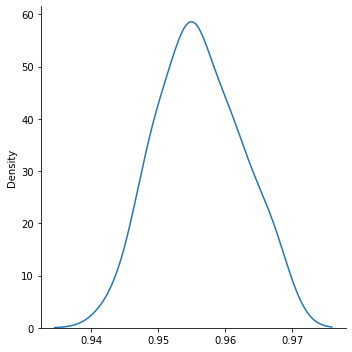

In [35]:
sns.displot(svm_results, kind='kde') # 2nd best result and a weird bell curve

In [36]:
from scipy.stats import f_oneway

In [37]:
_, p = f_oneway(tree_results, knn_results, svm_results, mlp_results)

h0: there is not a statistically significant difference between the algorithms.

h1: there are statistically significant differences between them.

In [38]:
p # p-value < alpha, h0 rejected

3.585955197093346e-77

In [43]:
import numpy as np
results = {
    'accuracy': np.concatenate([tree_results, knn_results, 
                                svm_results, mlp_results]),
    'algorithm': []
}

In [44]:
for i in range(30):
  results['algorithm'].append('tree')

In [45]:
for i in range(30):
  results['algorithm'].append('knn')

In [46]:
for i in range(30):
  results['algorithm'].append('svm')

In [47]:
for i in range(30):
  results['algorithm'].append('mlp')

In [50]:
import pandas as pd
df_results = pd.DataFrame(results)
df_results

,accuracy,algorithm
0,0.915359,tree
1,0.875490,tree
2,0.900000,tree
3,0.910784,tree
4,0.944444,tree
...,...,...
115,0.921569,mlp
116,0.932680,mlp
117,0.937582,mlp
118,0.943791,mlp


In [51]:
from statsmodels.stats.multicomp import MultiComparison

In [52]:
comparison = MultiComparison(df_results['accuracy'], df_results['algorithm'])
statistical_tests = comparison.tukeyhsd()
print(statistical_tests)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   knn    mlp   0.1325 0.001  0.1237  0.1413   True
   knn    svm   0.1514 0.001  0.1426  0.1602   True
   knn   tree   0.0973 0.001  0.0885  0.1061   True
   mlp    svm   0.0189 0.001  0.0101  0.0277   True
   mlp   tree  -0.0351 0.001 -0.0439 -0.0263   True
   svm   tree   -0.054 0.001 -0.0628 -0.0452   True
---------------------------------------------------


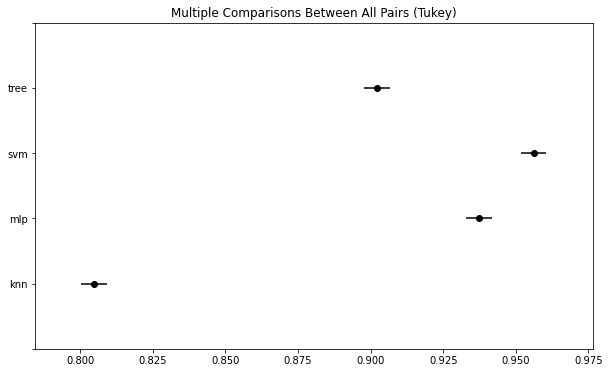

In [53]:
statistical_tests.plot_simultaneous();